In [6]:
import glob, os

directory = "\Desktop\Stanford\E. Coli"
filelist = glob.glob(f'{exp_dir}/*.pkl')
file = filelist[0]

filename = os.path.basename(file)
filename_base = filename.removesuffix('.pkl')
parts = filename_base.split('_')
day = int(parts[1][1:])
parts[-1]

NameError: name 'exp_dir' is not defined

Original column names: Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')
Stripped column names: Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')


ValueError: Could not interpret value `time` for `x`. An entry with this name does not appear in `data`.

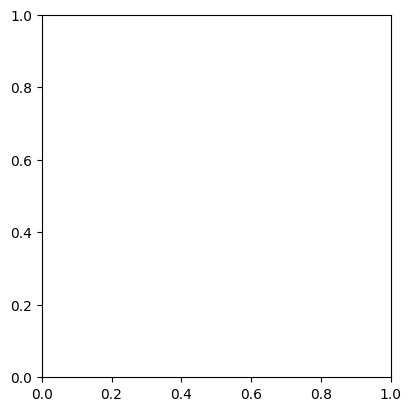

In [35]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Directory
directory = "/Users/cwash/Desktop/Stanford/E. Coli"

# Use pandas to read the source file
gc = pd.read_excel(f'{directory}/07-11-2024_E.Coli Cell Counting OD600nm.xlsx')

# Print the column names to inspect
print("Original column names:", gc.columns)

# Strip any leading or trailing spaces in the column names
gc.columns = gc.columns.str.strip()

# Print the column names again to verify they are correctly stripped
print("Stripped column names:", gc.columns)

# Make a blank figure on an x-axis
fig, ax = plt.subplots(figsize=[4, 4], layout='constrained')

# Plot the data
sns.lineplot(data=gc, x='time', y='Ln Final OD', ci='sd', ax=ax, marker="o", markersize=5, color='black')

# Set labels and scale
ax.set_ylabel('Culture density (cells/mL)', fontsize=9)
ax.set_xlabel('Time', fontsize=9)

# Set y and x limits and ticks
ax.set_ylim(top=1e9)
ax.set_xlim(right=5.6)
ax.set_xticks([1, 2, 3, 4, 5])
ax.tick_params(axis='both', labelsize=9)
ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_linewidth(1.1)

# Save as png and pdf
plt.savefig('growth_curve.png', dpi=600)
plt.savefig('growth_curve.pdf')